In [2]:
import tensorflow as tf
from tensorflow import keras
import time

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Creating a dictionary containing 10 indices of each label, and then plotting it.

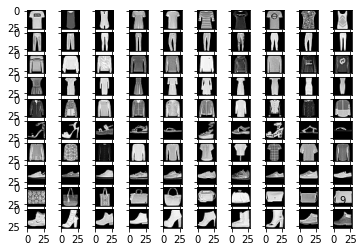

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fashionCategory = {}

for i in range(10):
    fashionCategory[i] = np.where(train_labels==i)[0][:10]

fig, ax = plt.subplots(10, 10, sharex='col', sharey='row')
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(train_images[fashionCategory[i][j]], cmap=plt.cm.gray)
    plt.title('%i' % i, fontsize = 10)


First reshaping the train dataset into a 2D array.

In [4]:
nsamples, nx, ny = train_images.shape

d2_train_images = train_images.reshape((nsamples,nx*ny))
print("new training data shape", d2_train_images.shape)

nTestsamples, nTestx, nTesty = test_images.shape
d2_test_images = test_images.reshape(nTestsamples, nTestx*nTesty)
print("new testing data shape", d2_test_images.shape)

new training data shape (60000, 784)
new testing data shape (10000, 784)


Applying KNN.

In [5]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
t0 = time.time()
knn.fit(d2_train_images, train_labels)
knn_train_run_time = time.time() - t0
print("KNN run time", knn_train_run_time)

KNN run time 12.77925181388855


Call score function

In [0]:
t0 = time.time()
knn_accuracy = knn.score(d2_test_images, test_labels)
knn_test_run_time = time.time() - t0

In [12]:
print("KNN test run time", knn_test_run_time)
print ("KNN accuracy", knn_accuracy)

KNN test run time 965.4923605918884
KNN accuracy 0.8554


Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()
t0 = time.time()
logisticReg.fit(d2_train_images, train_labels)
logisticReg_run_time = time.time() - t0
print("logistic regression run time", logisticReg_run_time)

logistic regression run time 35.28737664222717


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
t0 = time.time()
logisticReg_test_score = logisticReg.score(d2_test_images, test_labels)
logisticReg_test_run_time = time.time() - t0
print("logistic score = %.4f" % logisticReg_test_score)
print("logistic regression test time", logisticReg_test_run_time)

logistic score = 0.8412
logistic regression test time 0.04052114486694336


SVM

In [13]:
from sklearn import svm

svm_clf = svm.SVC()
t0 = time.time()
svm_clf.fit(d2_train_images, train_labels)
svml_run_time = time.time() - t0
print("SVM run time", svml_run_time)

SVM run time 763.2852070331573


In [18]:
t0 = time.time()
svm_score = svm_clf.score(d2_test_images, test_labels)
print("Test score = %.4f" % svm_score)
svm_test_run_time = time.time() - t0
print("SVM test time", svm_test_run_time)

Test score = 0.8828
SVM test time 275.0714831352234


SVM with RBF Kernel

In [14]:
from sklearn.svm import SVC
import time
svm_rbf = SVC(kernel='rbf', random_state=0, C=1.0, cache_size=4000)
t0 = time.time()
svm_rbf.fit(d2_train_images, train_labels)
svm_rbf_run_time = time.time() - t0

print("SVM RBF run time", svm_rbf_run_time)

SVM RBF run time 761.830274105072


In [15]:
t0 = time.time()
svm_rbf_score = svm_rbf.score(d2_test_images, test_labels)
svm_rbf_test_run_time = time.time() - t0
print("Test score = %.4f" % svm_rbf_score)
print("SVM RBF run time", svm_rbf_test_run_time)

Test score = 0.8828
SVM RBF run time 282.94755268096924


Tuning parameters to find best performance for each of these.

KNN with 7 neighbors

In [45]:
from sklearn import neighbors
knn2 = neighbors.KNeighborsClassifier(n_neighbors=7)
t0 = time.time()
knn2.fit(d2_train_images, train_labels)
knn2_run_time = time.time() - t0
print("KNN run time", knn2_run_time)

KNN run time 14.152279615402222


In [46]:
t0 = time.time()
knn2_score = knn2.score(d2_test_images, test_labels)
knn2_optimal_test_run_time = time.time() - t0
print(knn2_score)

0.854


Knn with 5 neighbors gives optimal solution.

Logistic regression with a list of learning rates

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10] }
logisticReg2 = GridSearchCV(LogisticRegression(), param_grid)

logisticReg2.fit(d2_train_images, train_labels)
logisticReg2.best_params_
print (logisticReg2.best_params_)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 0.001}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Among the hyperparameters supplied {'C': 0.001} gives the best test error performance. 

In [34]:
print(logisticReg2.best_estimator_)
logisticReg2_test_score = logisticReg2.best_estimator_.score(d2_test_images, test_labels)
print(logisticReg2_test_score)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8386


SVM reduced max_iters to get shorter run times

In [0]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(max_iter = 500), param_grid)
grid_search.fit(d2_train_images, train_labels)
grid_search.best_params_
print(grid_search.best_params_)
print(grid_search2.best_estimator_.score(d2_test_images, test_labels))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

SVM RBF Kernel

In [0]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search2 = GridSearchCV(svm.SVC(kernel='rbf', max_iter = 500), param_grid)
grid_search2.fit(d2_train_images, d2_train_images)
grid_search2.best_params_
print(grid_search2.best_params_)
print(grid_search2.best_estimator_.score(d2_test_images, test_labels))

Report train- and test-running time of each of your methods in the form of a table, andcomment on the relative tradeoffs across the different methods.

In [0]:
Algorithms = ['knn', 'Logistic regression', 'SVM', 'SVM RBF']
Accuracy = [knn_accuracy, logisticReg_test_score, svm_score, svm_rbf_score]
TrainRuntime = [knn_train_run_time, logisticReg_run_time, svml_run_time, svm_rbf_run_time]
TestRuntime = [knn_test_run_time, logisticReg_test_run_time, svm_test_run_time, svm_rbf_test_run_time]

In [26]:
from astropy.table import QTable
import astropy.units as u
import numpy as np

a = Algorithms
b = Accuracy
c = TrainRuntime
d = TestRuntime

t = QTable([a, b, c, d],
           names=('Algorithms','Accuracy','Train Runtime','Test Runtime'),
           meta={'name': 'first table'})
print(t)

     Algorithms     Accuracy   Train Runtime        Test Runtime   
------------------- -------- ------------------ -------------------
                knn   0.8554 12.078877687454224   955.5844943523407
Logistic regression   0.8412  35.28737664222717 0.04052114486694336
                SVM   0.8828  763.2852070331573   275.0714831352234
            SVM RBF   0.8828   761.830274105072  282.94755268096924


We make the following observations: 
 
*   We get best accuracies for svm and svm with rbf kernel.
*   If we want to get the least training runtime then KNN and logistic regression make more sense as they take least training time.
*   If we want least testing runtime then logistic regression takes the least time.
*   KNN takes a long time especially for larger K values for testing.
*   SVM with RBF kernel and linear SVM take similar time for training and testing. test+ train is least for logistic regression though it has a little bit less accuracy too.





 